# Tarea EDP
**Hecho por** Juan Olmos.
**Código** 2218060

* ¿Cómo podemos mejorar las funciones ECnL(), ED() y EB() para \textbf{no} tener que usar dos bucles anidados? 
		
* Implemente un código que permita, a partir de las funciones dadas mostrar en una sola imagen (3x3) que contenga,  el dato inicial $u_0(x,0)$, el resultado de estudiar la ecuación lineal y el resultado de estudiar la ecuación no lineal. Esto para $nx= 21$ $nx= 41$ y $nx= 81$,  Describa sus apreciaciones, y analice el porqué de los resultados obtenidos.
	
* En las comparaciones hechas anteriormente, tanto en la parte lineal como la no lineal, son iguales, parecidos o totalmente diferentes los datos obtenidos, ¿por qué? Realice un trabajo similar para la ecuación de difusión y la ecuación de Burgers. ¿Qué apreciaciones le merece?

***

Implemente un código que permita, a partir de las funciones dadas mostrar en una sola imagen (3x3) que contenga,  el dato inicial $u_0(x,0)$, el resultado de estudiar la ecuación lineal y el resultado de estudiar la ecuación no lineal. Esto para $nx= 21$ $nx= 41$ y $nx= 81$,  Describa sus apreciaciones, y analice el porqué de los resultados obtenidos.

In [1]:
import numpy as np                    
import matplotlib.pyplot as plt 
import time, sys                   
%matplotlib inline

In [2]:
def ECLspeed(u, nx, nt = 25):
    dx = 2 / (nx-1)
    sigma = .3 
    c = 1
    dt = sigma * dx / c 
    for n in range(nt): ## recorrer el número de pasos de tiempo
        un = u.copy()
        u[1:] = un[1:]- c * (dt / dx) * (un[1:] - un[:-1])
    return u

def ECnLspeed(u, nx, nt = 25, nu = 0.3):
    dx = 2 / (nx-1)
    sigma = .3 
    c = 1
    dt = sigma * dx / c 
    for n in range(nt): ## recorrer el número de pasos de tiempo
        un = u.copy()
        u[1:] = un[1:]- un[1:] * (dt / dx) * (un[1:] - un[:-1])
    return u

def EDspeed(u, nx, nt = 20, nu = 0.3):
    dx = 2 / (nx-1)
    sigma = .4 
    dt = sigma * dx**2 / nu 
    for n in range(nt):
        un = u.copy()
        u[1:-1] = un[1:-1] + nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2])
    return u

def EBspeed(u, nx, nt = 20, nu = 0.3):
    dx = 2 / (nx-1)
    sigma = .3 
    dt = sigma * dx**2 / nu 
    for n in range(nt):
        un = u.copy()
        u[1:-1] = un[1:-1] - un[1:-1] * dt / dx *(un[1:-1] - un[:-2]) + nu * dt / dx**2 *\
                (un[2:] - 2 * un[1:-1] + un[:-2]) 
        u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-1]) + nu * dt / dx**2 *\
                (un[1] - 2 * un[0] + un[-1])
        u[-1] = u[0]
    return u

def EB_profe(u, nx, nt = 20, nu = 0.3):
    dx = 2 / (nx-1)
    sigma = .3 
    dt = sigma * dx**2 / nu #note la diferencia...
    for n in range(nt):  
        # el equivalente de np.roll es pandas es pd.DataFrame.shift (me parece)
        # En ese caso no asume periodicidad !
        u_der = np.roll(u,-1)
        u_izq = np.roll(u,1)
        u = u - u *dt / dx * (u -u_izq) + nu * dt / dx**2 * (u_izq - 2*u +u_der)
    return u


Función para la ecuación lineal y otra para mostrar las imagenes

In [8]:
def f1(nx):
    dx = 2 / (nx-1)
    u = np.ones(nx)      
    u[int(.5 / dx):int(1 / dx + 1)] = 2  
    return u

#Funcion que pnita segun lo que se quiera
def mostrar_imagen(nx, tipo=None):
    if tipo is None:
        u = f1(nx)
        plt.plot(np.linspace(0, 2, nx), u, color='k');
    elif tipo=='EDs':
        u = EDspeed(f1(nx),nx)
        plt.plot(np.linspace(0, 2, nx), u, color='b');
    elif tipo=='EBs':
        u = EBspeed(f1(nx),nx)
        plt.plot(np.linspace(0, 2, nx), u, color='r');
        
    
    
def ECL(u, nx, nt = 25):
    dx = 2 / (nx-1)
    sigma = .3 
    c = 1
    dt = sigma * dx / c 
    for n in range(nt): 
        un = u.copy()
        u[1:] = un[1:]- c * (dt / dx) * (un[1:] - un[:-1])
    return u

Grafica 3x3 para los casos n=21,41 y 81

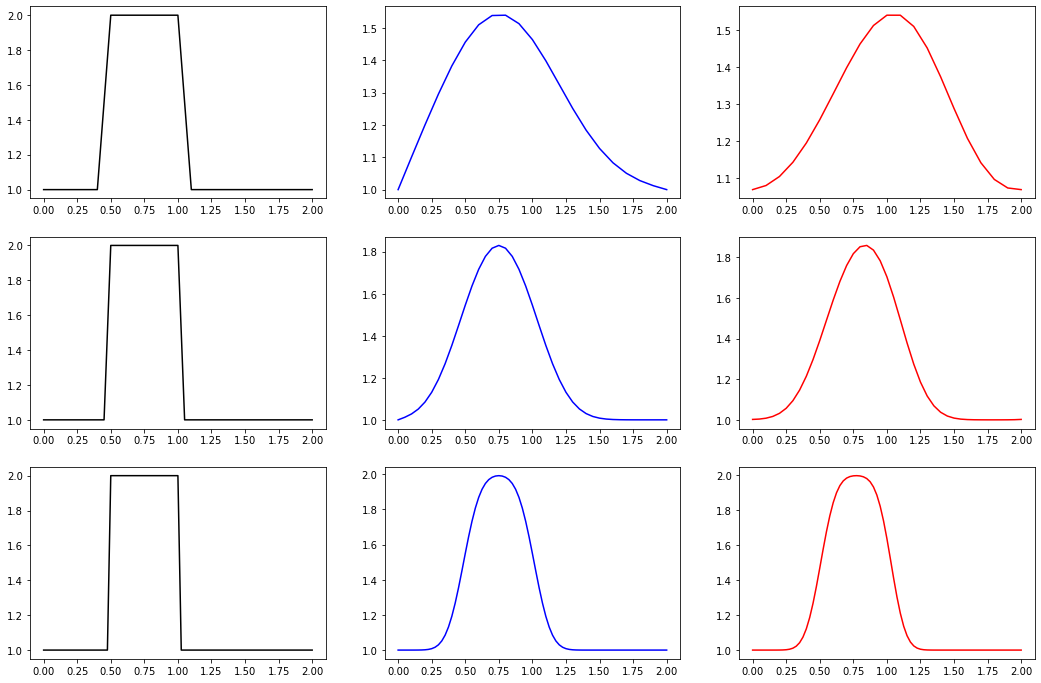

In [7]:
plt.figure(figsize=(18,12))
#como colocar un título general a un paquete 
nx = 21
plt.subplot(3, 3, 1) 
mostrar_imagen(nx)
plt.subplot(3, 3, 2) 
mostrar_imagen(nx, tipo='EDs')
plt.subplot(3, 3, 3) 
mostrar_imagen(nx, tipo='EBs')
nx = 41
plt.subplot(3, 3, 4) 
mostrar_imagen(nx)
plt.subplot(3, 3, 5) 
mostrar_imagen(nx, tipo='EDs')
plt.subplot(3, 3, 6) 
mostrar_imagen(nx, tipo='EBs')
nx = 81
plt.subplot(3, 3, 7) 
mostrar_imagen(nx)
plt.subplot(3, 3, 8) 
mostrar_imagen(nx, tipo='EDs')
plt.subplot(3, 3, 9) 
mostrar_imagen(nx, tipo='EBs')